# Trocar regiões de uma imagem

Autor: Almir Soares Firmo Filho

O objetivo deste notebook é mostrar como separar uma imagem em regiões e trocá-las de lugar.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

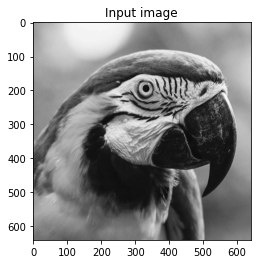

Dimensões da imagem:  (640, 640)


In [2]:
# Carregar imagem original
image = cv2.imread('arara2.jpg', cv2.IMREAD_GRAYSCALE)

plt.title('Input image')
plt.imshow(image,'gray')
plt.show()

print("Dimensões da imagem: ",image.shape)

Como a imagem é quadrada é possível dividí-la igualmente em 4 regiões. Para tal é necessário criar os índices de cada ponto dos 4 quadrados, atribuir à cada quadrado os pixels da imagem original e depois trocar as regiões para gerar a imagem final.

In [3]:
# Criar variáveis para altura e largura da imagem
height = image.shape[0]
width = image.shape[1]

# Criar os vetores dos índices (coordenadas) dos pontos inicial e final de cada parte da imagem 
partA_index = [0, int((height/2)), 0, int((width/2))]
partB_index = [0, int((height/2)), int(width/2), int(width)]
partC_index = [int(height/2), int(height), 0, int((width/2))]
partD_index = [int(height/2), int(height), int(width/2), int(width)]

# Separar imagem em 4 quadrados
partA = image[partA_index[0]:partA_index[1], partA_index[2]:partA_index[3]]
partB = image[partB_index[0]:partB_index[1], partB_index[2]:partB_index[3]]
partC = image[partC_index[0]:partC_index[1], partC_index[2]:partC_index[3]]
partD = image[partD_index[0]:partD_index[1], partD_index[2]:partD_index[3]]

# Trocar a posição das 4 partes da imagem
image2 = np.zeros([width,height],dtype=np.uint8)
image2[partA_index[0]:partA_index[1], partA_index[2]:partA_index[3]] = partD
image2[partB_index[0]:partB_index[1], partB_index[2]:partB_index[3]] = partC
image2[partC_index[0]:partC_index[1], partC_index[2]:partC_index[3]] = partB
image2[partD_index[0]:partD_index[1], partD_index[2]:partD_index[3]] = partA

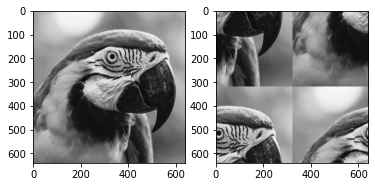

In [4]:
fig,ax = plt.subplots(1,2)
plt.subplot(121),plt.imshow(image,'gray')
plt.subplot(122),plt.imshow(image2, 'gray')
plt.show()

In [5]:
# Cria as janelas para exibir as imagens
cv2.namedWindow('Imagem original',cv2.WINDOW_AUTOSIZE)
cv2.namedWindow('Imagem pós processada',cv2.WINDOW_AUTOSIZE)

# Exibe as imagens até que alguma tecla seja pressionada
cv2.imshow('Imagem original',image)
cv2.imshow('Imagem pós processada',image2)
cv2.waitKey(0)

-1